# 🐍Day3_Multiple_Linear_Regression

## Step 1: Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/50_Startups.csv")
df.shape

(50, 5)

In [2]:
# df.head()
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [3]:
X = df.iloc[:,0:4].values
Y = df.iloc[:,4].values

In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
#encoding Categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labellencoder = LabelEncoder()
X[:,3] = labellencoder.fit_transform(X[:,3])
# onehotencoder = OneHotEncoder(categorical_features = [3])
onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()

In [5]:
#Avoiding Dummy Variable Trap
X = X[:,1:]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

## Step 2: Fitting Multiple Linear Regression to the Training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Step 3: Predicting the Test set results

In [15]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
lin_rmse

36780.34178474007

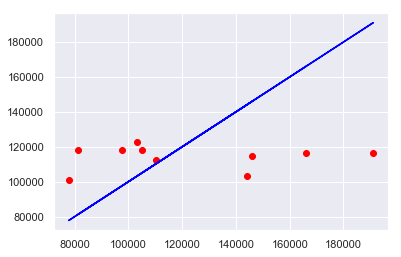

In [12]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns; sns.set()

plt.scatter(Y_test,y_pred,color = "red")
plt.plot(Y_test,Y_test,color="blue")

# 🔀UseR

In [47]:
library(caret)
df <- read.csv("https://raw.githubusercontent.com/Avik-Jain/100-Days-Of-ML-Code/master/datasets/50_Startups.csv")
head(df)

R.D.Spend,Administration,Marketing.Spend,State,Profit
165349.2,136897.80,471784.1,New York,192261.8
162597.7,151377.59,443898.5,California,191792.1
153441.5,101145.55,407934.5,Florida,191050.4
144372.4,118671.85,383199.6,New York,182902.0
142107.3,91391.77,366168.4,Florida,166187.9
131876.9,99814.71,362861.4,New York,156991.1


In [48]:
fit_dummy <- dummyVars(~State,data=df)
State_dummy <- as.data.frame(predict(fit_dummy,newdata=df))

In [49]:
df <- cbind(df[,c(1:3)],State_dummy,df[,'Profit'])
colnames(df)[7] = "Profit"

In [50]:
set.seed(42)
trn_id <- createDataPartition(df$Profit,p=0.8,list = F)
trn <- df[trn_id,]
vld <- df[-trn_id,]

In [51]:
fit_lr <- train(Profit~.,data=trn,method = "glm",
               preProc = c("center", "scale"))
fit_lr

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient 

Generalized Linear Model 

42 samples
 6 predictor

Pre-processing: centered (6), scaled (6) 
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 42, 42, 42, 42, 42, 42, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  10907.75  0.9421784  8672.774


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

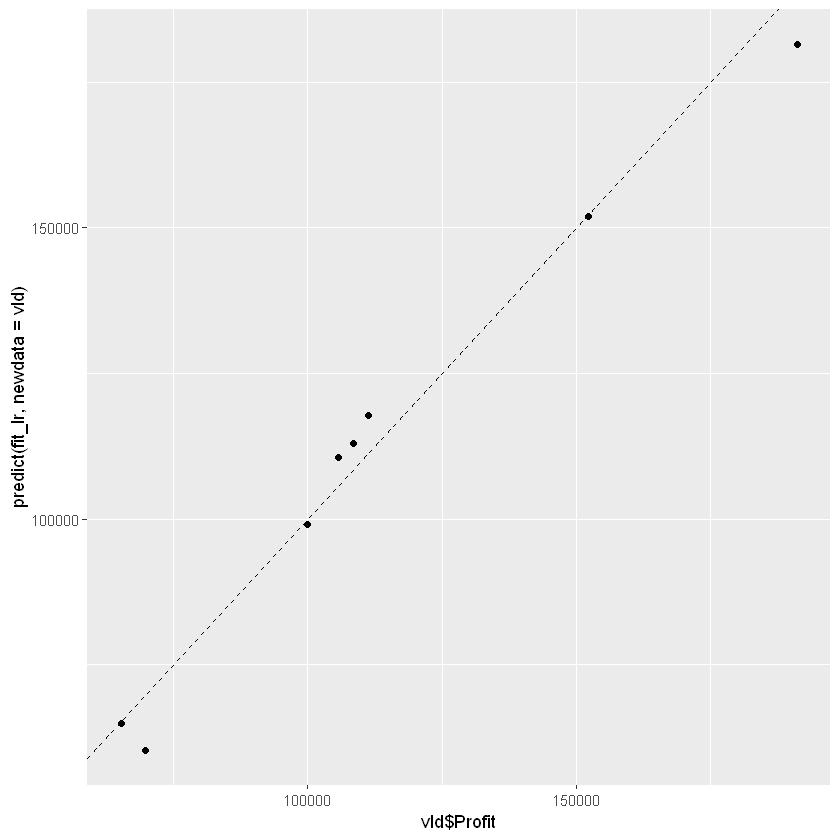

In [54]:
library(ggplot2)
ggplot(data=vld,
       aes(x=vld$Profit,y=predict(fit_lr,newdata=vld))) + geom_point() + geom_abline(linetype="dashed") 